In [9]:
import skimage.transform as transform
import skimage.filters as filters
import matplotlib.pyplot as plt
from scipy import stats
from PIL import Image
import numpy as np
import pickle
import math
import json
import pdb
import cv2

In [10]:
gcam_folder_pythia = '/srv/share3/mummettuguli3/code/pythia_gradcam/GRADCAM_MAPS/madhura/'

In [11]:
gimg_pythia = np.load(gcam_folder_pythia + str(1967892) + '.npy')

In [12]:
imgId = 196789

In [13]:
dataset_path = '/coc/scratch/mummettuguli3/data/vqa2.0/working/'

In [14]:
imgDir = dataset_path + 'Images/val2014/'

In [16]:
imgFilename = 'COCO_val2014_' + str(imgId).zfill(12) + '.jpg' 
image_path = imgDir + imgFilename

In [17]:
img = cv2.imread(image_path)

In [19]:
def show_img(x, y):
    """Save image x and y side-by-side."""
    fig=plt.figure(figsize=(15, 3), dpi= 80, facecolor='w', edgecolor='k')
    fig.add_subplot(1, 5, 1)
    plt.imshow(x)
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1, 5, 2)
    plt.imshow(y)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [20]:
def normalize(x):
    """Normalize to range 0-1."""
    normalized = (x - np.min(x)) / (np.max(x) - np.min(x))
    return normalized

In [21]:
def overlay(img_np, att_map, blur=True, overlap=True):
    """Superimpose image on attention map."""
    # Rescale image to 0..1
    img = normalize(img_np)
    att_map = normalize(att_map)
    # att_map = transform.resize(att_map, (img.shape[:2]), order = 3, mode = 'nearest')
    att_map = transform.resize(att_map, (img.shape[:2]), order=3, mode='constant')
    if blur:
        att_map = filters.gaussian(att_map, 0.02 * max(img.shape[:2]))
        att_map -= att_map.min()
        att_map /= att_map.max()
    cmap = plt.get_cmap('jet')
    att_map_v = cmap(att_map)
    att_map_v = np.delete(att_map_v, 3, 2)
    if overlap:
        att_map = 1 * (1 - att_map**0.7).reshape(att_map.shape + (1,)) * img + (att_map**0.7).reshape(att_map.shape + (1,)) * att_map_v
    return att_map

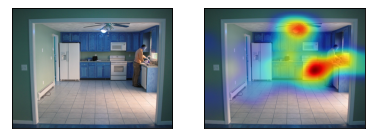

In [23]:
show_img(img, overlay(img, gimg_pythia))

In [24]:
with open('questions.pickle', 'rb') as handle:
    questions = pickle.load(handle)
with open('answers.pickle', 'rb') as handle:
    answers = pickle.load(handle)

In [25]:
# PRINT QUESTION
annId = 1967892
ques = questions[annId]
ans = answers[annId]
print("AnnId: %d, QUESTION: %s, ANSWER: %s" % (annId, ques, ans))

AnnId: 1967892, QUESTION: w, ANSWER: green
